Time Period

In [19]:
import numpy as np

mu = 3.986e14
RE = 6371e3

def calculate_orbital_and_eclipse_periods(altitude_km):
    altitude_m = altitude_km * 1e3
    a = RE + altitude_m
    T = 2 * np.pi * np.sqrt(a**3 / mu)
    theta = np.arcsin(RE / a)
    alpha = 2 * theta
    f = alpha / (2 * np.pi)
    T_eclipse = f * T
    T_minutes = T / 60
    T_eclipse_minutes = T_eclipse / 60
    return T_minutes, T_eclipse_minutes

def main():
    altitude_km = float(input("Enter the altitude of the satellite in kilometers: "))
    orbital_period, eclipse_period = calculate_orbital_and_eclipse_periods(altitude_km)
    print("Altitude: ", altitude_km,"km")
    print(f"Orbital Period: {orbital_period:.2f} minutes")
    print(f"Eclipse Period: {eclipse_period:.2f} minutes")

if __name__ == "__main__":
    main()


Altitude:  444.0 km
Orbital Period: 93.32 minutes
Eclipse Period: 35.88 minutes


Plotting the variation

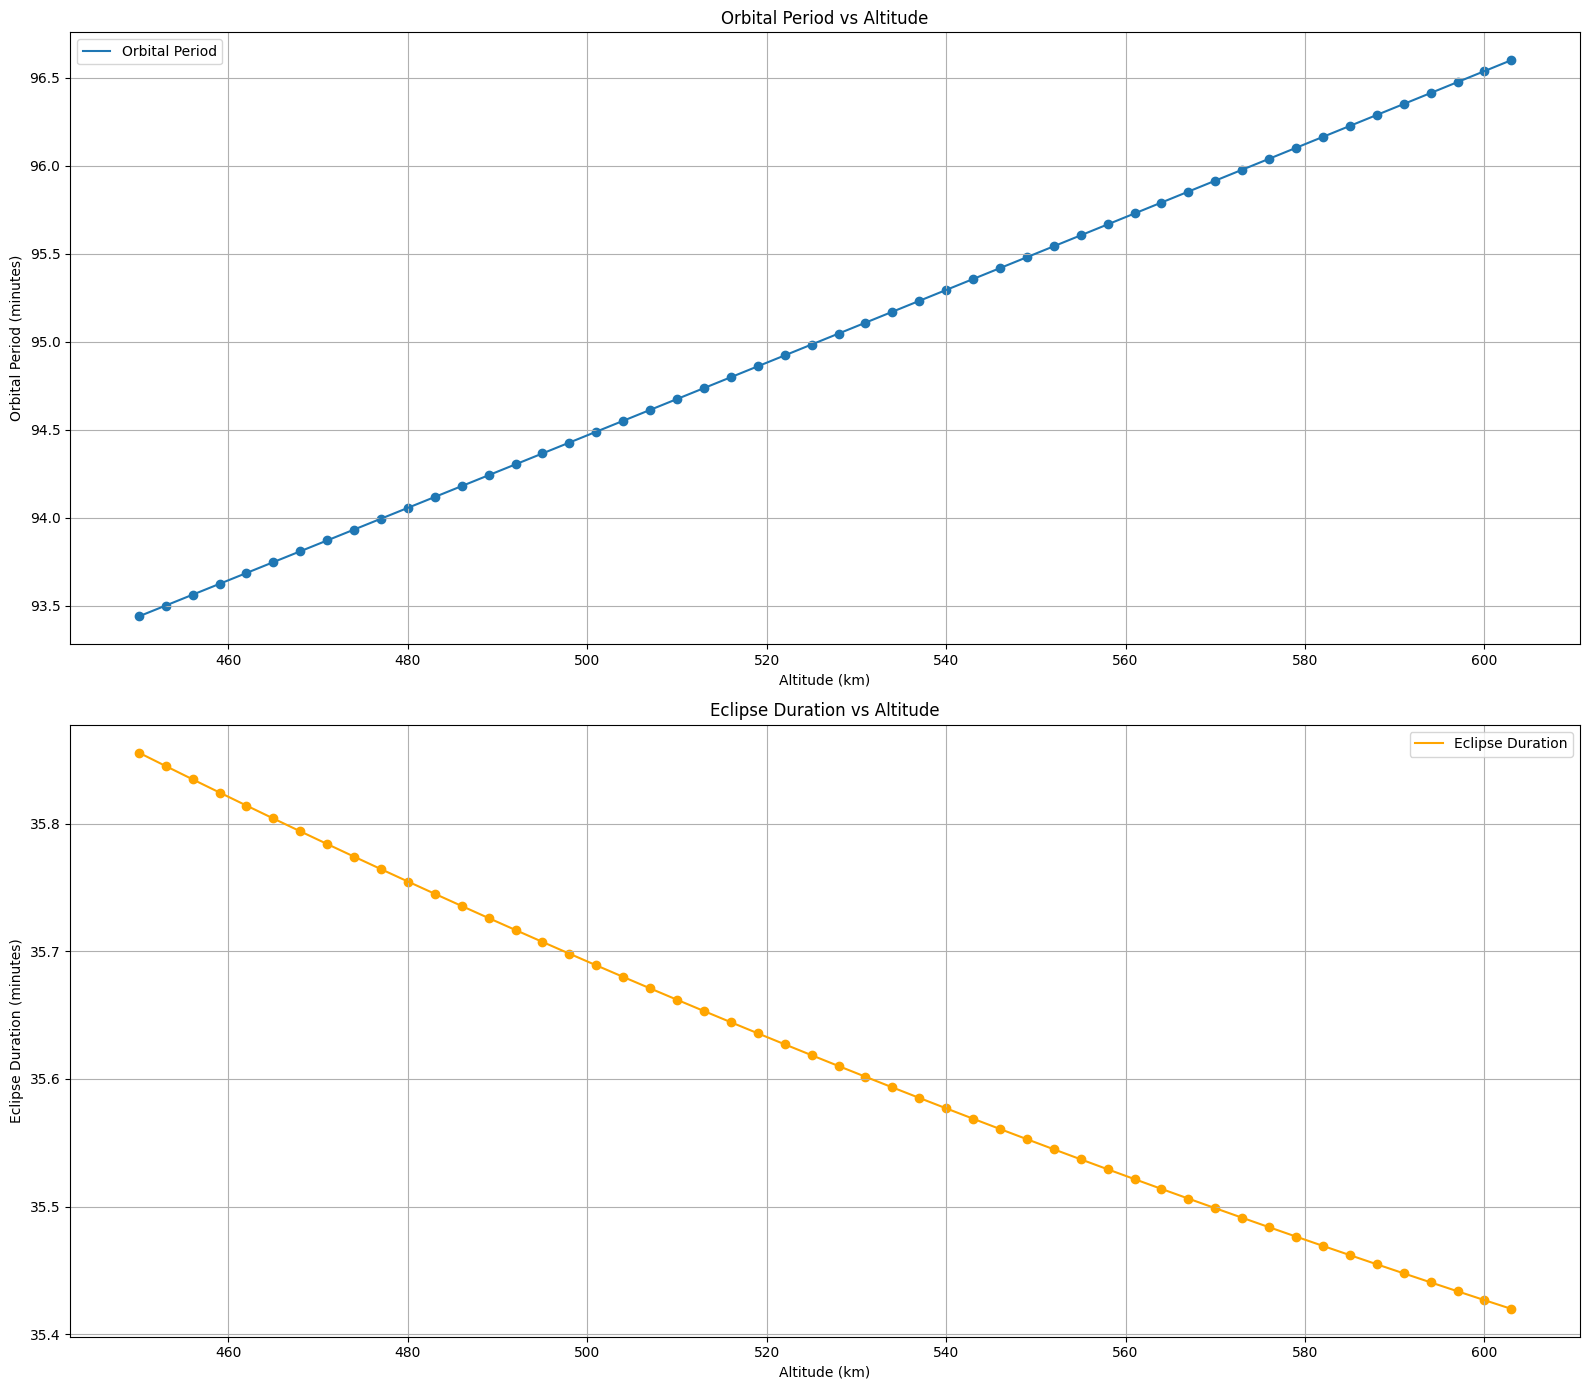

In [15]:
import numpy as np
import matplotlib.pyplot as plt

mu = 3.986e14
RE = 6371e3

altitudes_km = np.arange(450, 605, 3)
altitudes_m = altitudes_km * 1e3

orbital_periods = []
eclipse_durations = []

for altitude in altitudes_m:
    a = RE + altitude
    T = 2 * np.pi * np.sqrt(a**3 / mu)
    theta = np.arcsin(RE / a)
    alpha = 2 * theta
    f = alpha / (2 * np.pi)
    T_eclipse = f * T
    orbital_periods.append(T)
    eclipse_durations.append(T_eclipse)

orbital_periods_minutes = np.array(orbital_periods) / 60
eclipse_durations_minutes = np.array(eclipse_durations) / 60

plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
plt.plot(altitudes_km, orbital_periods_minutes, label='Orbital Period')
plt.scatter(altitudes_km, orbital_periods_minutes)
plt.xlabel('Altitude (km)')
plt.ylabel('Orbital Period (minutes)')
plt.title('Orbital Period vs Altitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(altitudes_km, eclipse_durations_minutes, label='Eclipse Duration', color='orange')
plt.scatter(altitudes_km, eclipse_durations_minutes, color='orange')
plt.xlabel('Altitude (km)')
plt.ylabel('Eclipse Duration (minutes)')
plt.title('Eclipse Duration vs Altitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
